In [52]:
"""
Introduction:
Các bạn vào trang web sau: https://quickdraw.withgoogle.com/
Các bạn hãy chơi thử game trong vòng 1-2 phút
Đây là game QuickDraw, được phát triển dựa trên bộ dataset nổi tiếng cùng tên của Google. Các bạn có thể vào link sau
https://quickdraw.withgoogle.com/data
để có cái nhìn tổng quát về bộ dataset này. Các bạn có thể click vào 1 icon bất kì để xem các bản vẽ của category tương ứng

Pre-requisites:
Các bạn hãy vào link sau đây
https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false
và tự chọn cho mình 10 categories mà các bạn thích (hint: Đừng chọn category nào quá phức tạp)
Sau đó các bạn hãy download các file tương ứng của các categories này (click vào mũi tên đi xuống ở dòng tương ứng)
Các file được download sẽ có tên như sau: full_numpy_bitmap_{category}.npy. Sau đó các bạn hãy để các file .npy này
vào chung với folder của script python này. Giờ các bạn có thể chuyển sang phần tiếp theo - phần lập trình
"""
import numpy as np
from matplotlib import pyplot as plt

# Bước 1: Các bạn hãy chọn 1 trong số các file .npy mà các bạn vừa tải về ở trên, và thay đổi đường dẫn tương ứng phía dưới
file_path = "./full_numpy_bitmap_airplane.npy"  # <= Các bạn thay từ bicycle bằng tên tương ứng của category các bạn chọn nhé
images = np.load(file_path).astype(np.float32)  # Load toàn bộ các ảnh của category này vào biến images
print(images.shape)
train_images = images[:-10]  # Lấy tất cả ảnh, ngoại trừ 10 ảnh cuối ra làm bộ training.
test_images = images[-10:]  # Giữ 10 ảnh cuối làm bộ test
print(train_images.shape)
print(test_images.shape)

(151623, 784)
(151613, 784)
(10, 784)


In [53]:
#TODO Bước 2: Các bạn hãy tính ra 1 bức ảnh trung bình của bộ training. Bức ảnh này sẽ có kích thước 28x28 pixel (hint: 784=28*28)
avg_image = np.mean(train_images, axis=0).reshape(28, 28)
print(avg_image.shape)
print(avg_image)

(28, 28)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.54595582e-03 4.86040115e-02 1.06982909e-01
  1.71053931e-01 2.55486012e-01 3.39139789e-01 4.46426094e-01
  5.81051767e-01 7.87412703e-01 1.12275994e+00 1.66891360e+00
  2.29433489e+00 2.81266785e+00 2.86137080e+00 2.36659122e+00
  1.77697158e+00 1.28966510e+00 9.34438348e-01 6.72950208e-01
  5.28635383e-01 4.37633961e-01 3.57429773e-01 2.65788555e-01
  1.76403075e-01 7.82518685e-02 3.04063642e-03 0.00000000e+00]
 [0.00000000e+00 5.06091155e-02 3.92103583e-01 7.30669558e-01
  1.12003589e+00 1.56282115e+00 2.04960656e+00 2.68606257e+

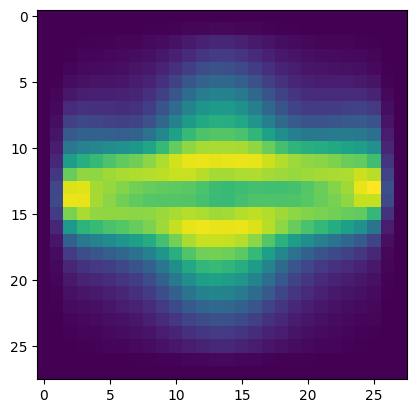

In [54]:
# Bước 3: Các bạn sẽ visualize bức ảnh trung bình các bạn vửa tính được ở bước 2 bằng 2 dòng sau. Các bạn thử
# xem các bạn có nhận ra được category mà các bạn chọn bằng cách nhìn vào bức ảnh trung bình này không nhé
plt.imshow(avg_image)
plt.show()

In [55]:
# Bước 4: Các bạn chọn 1 index bất kì từ 0 đến 9. Ví dụ mình chọn index = 4
# Sau đó các bạn hãy tính tích vô hướng (dot product) của bức ảnh test này với bức ảnh trung bình các bạn tính được ở trên
index = 4  # Các bạn có thể thay đổi index tùy ý
test_image = test_images[index]
print(test_image.shape)
print(avg_image.shape)
avg_image = avg_image.flatten()
print(avg_image.shape)
#TODO Các bạn tính tích vô hướng (dot product) của bức ảnh test và ảnh trung bình ở dòng dưới đây
# (các bạn có thể code trên nhiều hơn 1 dòng)
test_and_avg_score = np.dot(test_image, avg_image)
print(test_and_avg_score)

(784,)
(28, 28)
(784,)
3916402.0


In [56]:
# Bước 5: Các bạn hãy lặp lại bước 1 đến 3 cho tất cả các categories còn lại (chú ý tại bước 1 các bạn không cần phân
# ra train với test images nữa nhé, coi như là dùng tất cả cho train). Sau đó các bạn hãy tính tích vô hướng của từng ảnh
# trung bình của ảnh test các bạn chọn ở bước 4 với từng bức ảnh trung bình này.
#
# Cuối cùng các bạn xem là liệu trong 10 score này, score tương ứng với tích vô hướng của ảnh test này với
# ảnh trung bình của category của chính nó có phải là score lớn nhất không nhé. Các bức ảnh trung bình mà các bạn tính ra
# có thể xem như là weight cho từng category mà các bạn vừa học ở bài 1 (tất nhiên là weight của mô hình sau khi đã
# train xong)

categories = ["alarm clock", "ant", "basketball", "bathtub", "beach", "birthday cake", "book", "bread", "bridge"]

avg_images = {}
for category in categories:
    file_path = f"./full_numpy_bitmap_{category}.npy"
    images = np.load(file_path).astype(np.float32) 
    avg_images[category] = np.mean(images, axis=0).reshape(28, 28)

index = 4
test_image = test_images[index]

scores = {}
for category, avg_image in avg_images.items():
    score = np.dot(test_image, avg_image.flatten())
    scores[category] = score

for category, score in scores.items():
    print("Category: {}, Score: {}".format(category, score))

max_score_categories_key = max(scores, key=scores.get)
max_score_categories_value = max(scores.values())
print(max_score_categories_key)
print(max_score_categories_value)

print(f"Score tương ứng với tích vô hướng của ảnh test với ảnh trung bình của category của chính nó có phải là score lớn nhất không? {"Yes" if max_score_categories_value < test_and_avg_score else "No"}")

Category: alarm clock, Score: 2667717.5
Category: ant, Score: 3811725.25
Category: basketball, Score: 3620661.0
Category: bathtub, Score: 3209539.0
Category: beach, Score: 3449831.5
Category: birthday cake, Score: 3098895.0
Category: book, Score: 2873451.0
Category: bread, Score: 2099809.75
Category: bridge, Score: 3726683.0
ant
3811725.2
Score tương ứng với tích vô hướng của ảnh test với ảnh trung bình của category của chính nó có phải là score lớn nhất không? Yes
